<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Department of Computer Engineering
</font>
<p></p>
<font color=blue>
Artificial Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2022

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 1
			</font>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  1 Aban
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

<h1> Personal Info </h1>
<br>
<font size=3>
    
student_number =  99102123

    
Name = Hossein

Last_Name = Goli
    </font>

<h1> Rules</h1>
<br>
<font size=3>
- This assignment is due Aban 1th at 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Aban 11th at 23:59:59.
    </font>

<h1> Requirements </h1>
    <br>
    <font size=3>
Assignment's required and recommended libraries are imported here.
    </font>

In [15]:
!pip install tqdm
!pip install -- upgrade matplotlib

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import pandas as pd
from collections import namedtuple

<h1> Convexity Check </h1>
    <br>
    
<font size=3>
Some functions are given here which are needed to be classified as convex or non-convex. You need to implement them and check their convexity. Any brute force method is acceptable as long as you specify whether or not these are convex and in case of being non-convex what their exception interval and middle point are according to convexity check formula:
</font>    

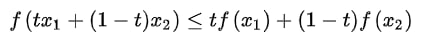

<font size=3>
Here, $tx_1 + (1-t)x_2$ is the exception middle point where given $t$ conteradicts previous inequality and your exception interval is $(x_1,x_2)$
    
At last, you need to visualize these functions in $R^2$ (for all functions) as well as their exception intervall [line] and exception middle point (if non-convex).

To select the general considered domain of these functions every applicable domain is acceptable for non-convex ones, and in case of convex ones, domain has to be large enough to show the overal trend of the function.  
    
</font>

<font size=3>

a)
$f_1(x) = e^{(|x^{10}-x^8|)}$
<br/>
b)
$f_2(x) = e^{x^2 + 2x + \frac{1}{x}} \quad for \quad x \in (0, \infty)$
<br/>
c)
$f_3(x) = -\log{|2 cos(x) + \frac{100}{x}|} $
    
</font>

In [17]:
def f1(x):
    # implementation of f1 according to previous formula
    return np.exp(np.abs(x ** 10 - x ** 8))

def f2(x):
    # implementation of f2 according to previous formula
    return np.exp(x ** 2 + 2 * x + 1 / x)

def f3(x):
    # implementation of f3 according to previous formula
    return -np.log(np.abs(2 * np.cos(x) + 100 / x))

In [18]:
ConvexityResult = namedtuple("ConvexityResult", ["is_convex", "exc_interval", "exc_mid_pt"])

def check_convexity(func, start_interval=0.01, end_interval=100.0, step=0.01):
    # Check the input function for convexity
    epsilon = 0.05
    delta = 1e-1
    for i in np.arange(start_interval, end_interval, step):
        for j in np.flip(np.arange(i + step, end_interval, step)):
            for t in np.arange(0, 1, delta):
                if (func(t * i + (1 - t) * j) - (t * func(i) + (1 - t) * func(j)) > epsilon):
                    print(f"i = {i}, j = {j}, t = {t}")
                    print(
                        f"f(t*i + (1-t)*j) = {func(t * i + (1 - t) * j)}, t*f(i) + (1-t)*f(j) = {t * func(i) + (1 - t) * func(j)}")
                    return ConvexityResult(False, [i, j], t * i + (1 - t) * j)
    # if is_convex == False then exc values are None
    return ConvexityResult(True, None, None)


i = 0.01, j = 0.9899999999999999, t = 0.1
f(t*i + (1-t)*j) = 1.0853431395686033, t*f(i) + (1-t)*f(j) = 1.0166790241049697


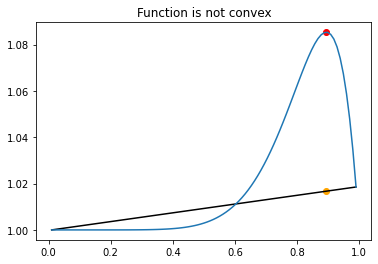

Function is convex
starting_interval = 0.01, end_interval = 10, step = 0.01


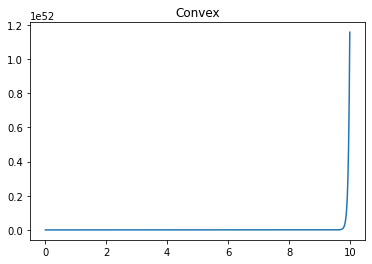

i = 0.01, j = 0.9899999999999999, t = 0.1
f(t*i + (1-t)*j) = -4.73059802833819, t*f(i) + (1-t)*f(j) = -5.084477426239539


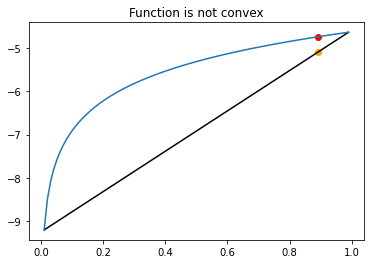

In [19]:
def visualize(func, convexity_res, start_interval=0.01, end_interval=1.0, step=0.01):
    # Visualize the input function
    # If the function is not convex, then visualize the excision interval
    # If the function is convex, then visualize the function
    if not convexity_res.is_convex:
        plt.title("Function is not convex")
        x1 = convexity_res[1][0]
        x2 = convexity_res[1][1]
        y1 = func(x1)
        y2 = func(x2)
        mid = convexity_res[2]
        plt.scatter(mid, func(mid), color='red', marker='o')
        plt.scatter(mid, y1 + (y2 - y1) / (x2 - x1) * (mid - x1), color='orange', marker='o')
        x = np.linspace(x1, x2, int((x2 - x1) / step))
        y = func(x)
        plt.plot([x1, x2], [y1, y2], color='black')
        plt.plot(x, y)
        plt.show()
    else:
        plt.title("Convex")
        print("Function is convex")
        print(f"starting_interval = {start_interval}, end_interval = {end_interval}, step = {step}")
        x = np.arange(start_interval, end_interval, step)
        y = func(x)
        plt.plot(x, y)
        plt.show()

def f4(x):
    return x**2

visualize(f1, check_convexity(f1, end_interval=1))
visualize(f2, check_convexity(f2, end_interval=10) , end_interval=10)
visualize(f3, check_convexity(f3, end_interval=1))



<h1> Continuous Optimization</h1>
 
<br> 
<font size=3> 
Here, you need to implement the Gradient Descent (GD) method to minimize the given function. This function ( $f(x,y)$ ) consists of multiple modals which causes some local minimas. Then, you need to examine two types of augmentation on GD. First, a mechanism similar to Simulated Anealing (SA) which we will recall as learning rate decay and second, adding momentum to update equation of GD.
    <br>
    Provide visualization and an explanation for the behaviour of all GD variations: GD, GD+lr_decay, and GD+momentum.
    </font>

In [20]:
def g(x, y):
    return np.cos(x)*np.cos(y)*np.exp(-x**2-y**2)

def f(x, y):
    return -g(2*x,2*y) + \
        0.05*g(2*x + 0.5, 2*y + 0.5) - 0.1*g(x + 1, y + 1) + \
        0.05*g(2*x + 0.5, 2*y - 0.5) - 0.1*g(x + 1, y - 1) + \
        0.05*g(2*x - 0.5, 2*y + 0.5) - 0.1*g(x - 1, y + 1) + \
        0.05*g(2*x - 0.5, 2*y - 0.5) - 0.1*g(x - 1, y - 1)

<font size=3>
    The following figure shows how this function would look like in $R^3$ space:

</font>

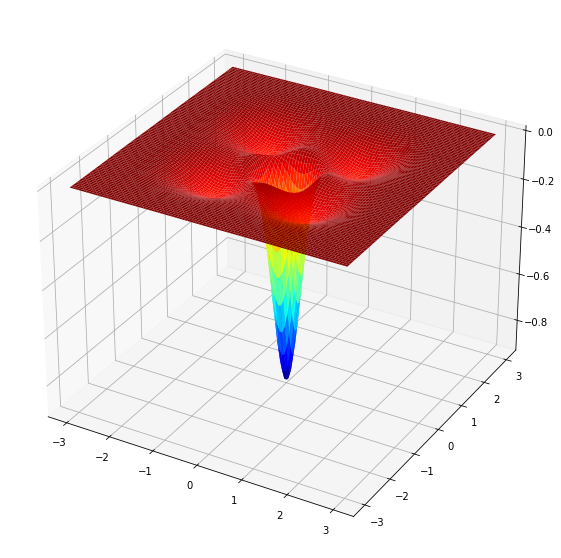

In [21]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
plt.show()

<font size=3>
    All these 3 scenarios need a gradient function which is to be implemented using <u><b>numeric</b></u> methods:
</font>

In [22]:
def grad(func, x, y, eps=1e-8):
    # Calculate gradient for the input function using numeric methods
    # subjected to input values: x, y
    x_grad = (func(x + eps, y) - func(x - eps, y)) / (2 * eps)
    y_grad = (func(x, y + eps) - func(x, y - eps)) / (2 * eps)
    return (x_grad, y_grad)

<font size=3>
    You also need to visualize the updating path from the start point to the convergence. Addressing multiple experiments for each scenario (i.e. multiple initial points), you can just visualize one experiment with the result closest to average of all resutls (of that scenario) or just visualize any experiment that suits best to the explanation you're going to provide for this scenario.
    <br><br>
    An example is provided here:
</font>

In [23]:
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [24]:
def path_visualize(pts):
    global X, Y, Z
    # pts: [N, 2]
    # visualizes input array of points constructing convergence path
    plt.figure(figsize=(10, 10))
    plt.contour(X, Y, np.exp(Z)**10, cmap='Spectral')
    a_x, a_y = np.array(pts).T
    plt.plot(a_x, a_y, color='red');

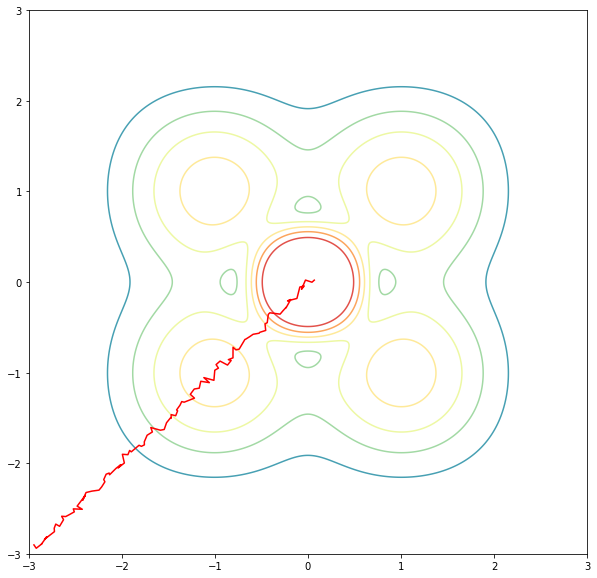

In [25]:
# An example to show how path_visualize looks like
pts = np.array([np.linspace(-3, 0, 100), np.linspace(-3, 0, 100)]).T
pts += np.random.rand(pts.shape[0], 2)/10
path_visualize(pts)

### Vanila GD

<font size=3>
    The first scenario is the simple, original Gradient Descent. You need to analyze and explain the effect of different constant learning rates ( [0.001, 0.01, 0.1, 1, 10] ). Run optimization steps for 10000 iterations and from 5 different random initial points.
</font>

# LR analysis 
<font face="Times New Roman" size=4><div dir=ltr>
we can see that a small learning rate (0.001) doesnt always converge to a local minima beacuse of small update and needs more iterations and converges very slowly (0.001)

also a big learning rate oscilate and have some kind of zig zag move and will not even converge with more iterations beacause of big update rule near local optima(10)

while a good learning rate which is not very small that needs too much iteration and isng so big not to converge is opimal (such as 0.1)

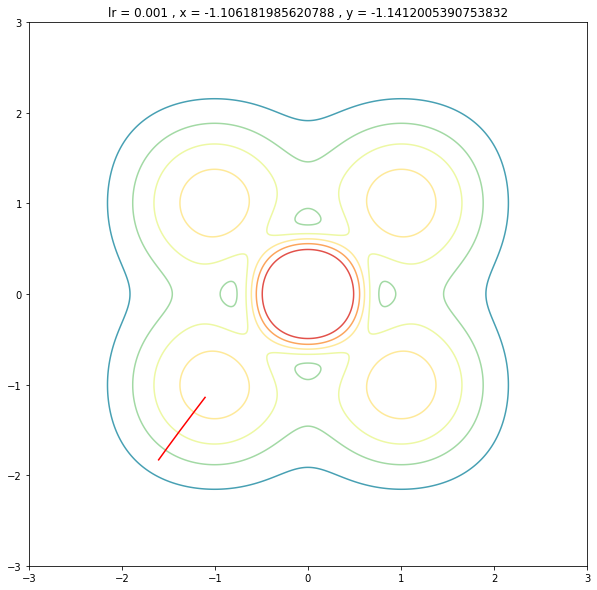

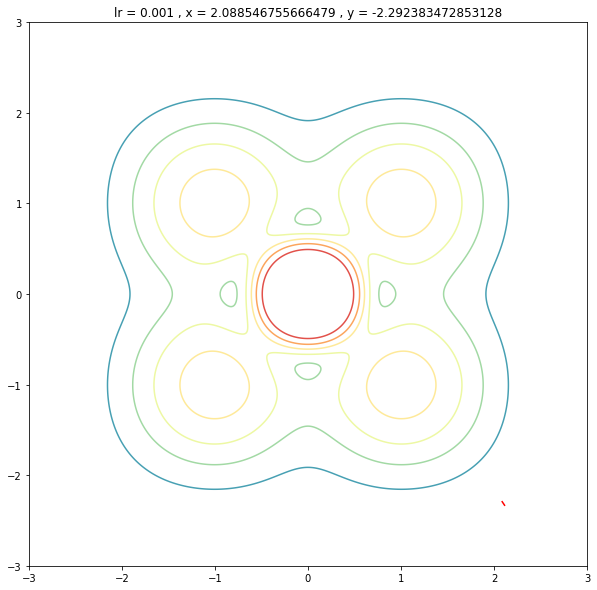

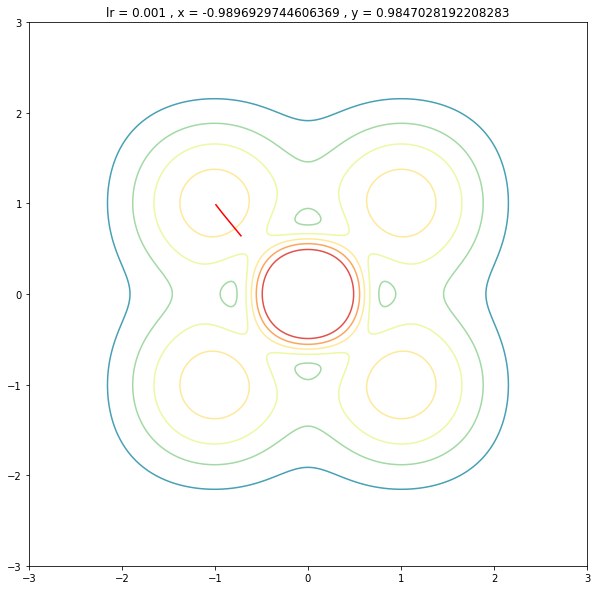

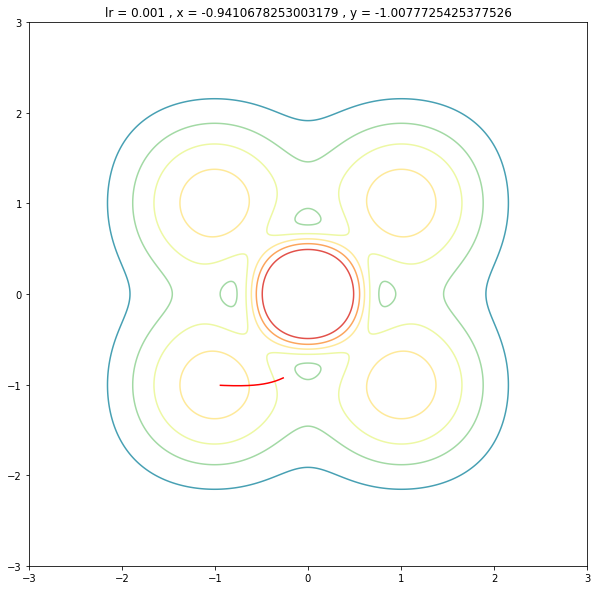

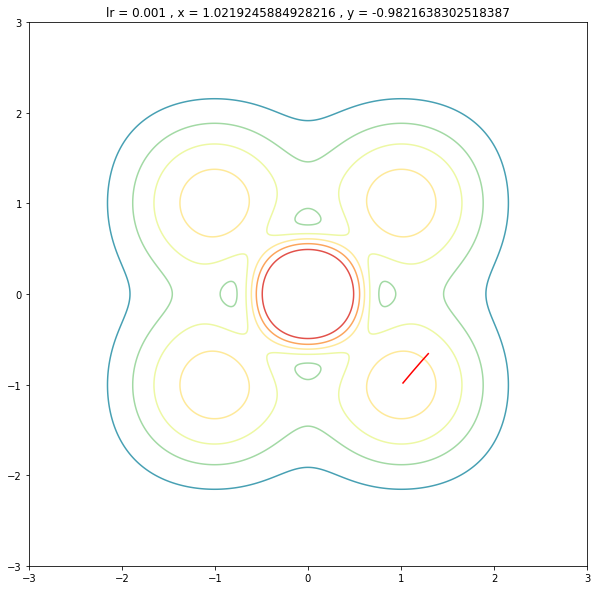

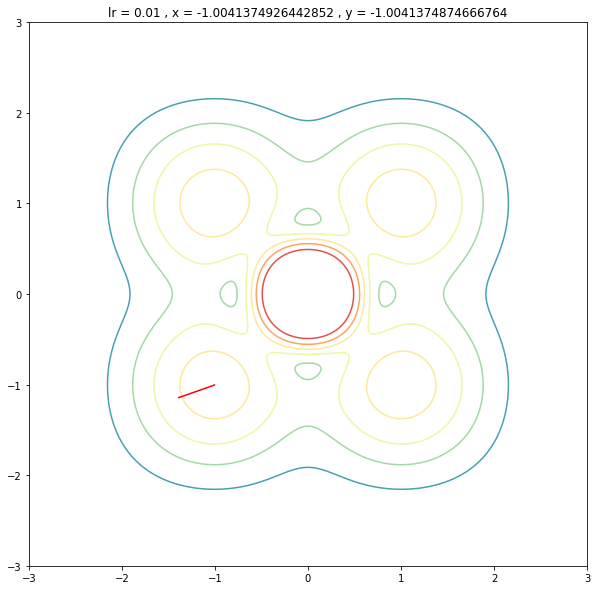

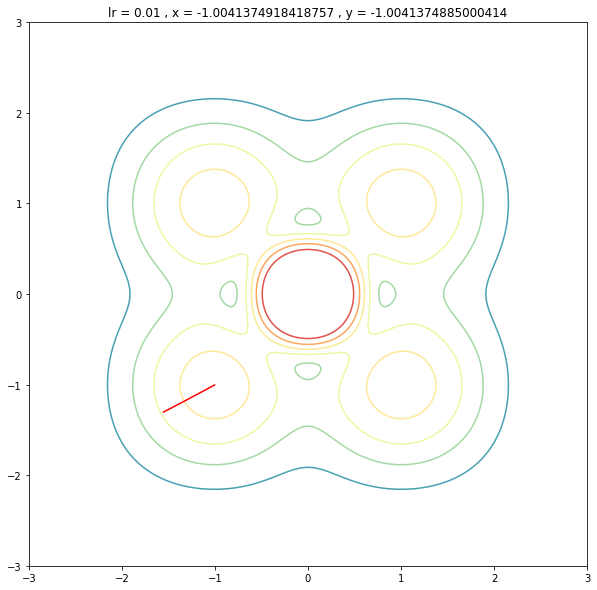

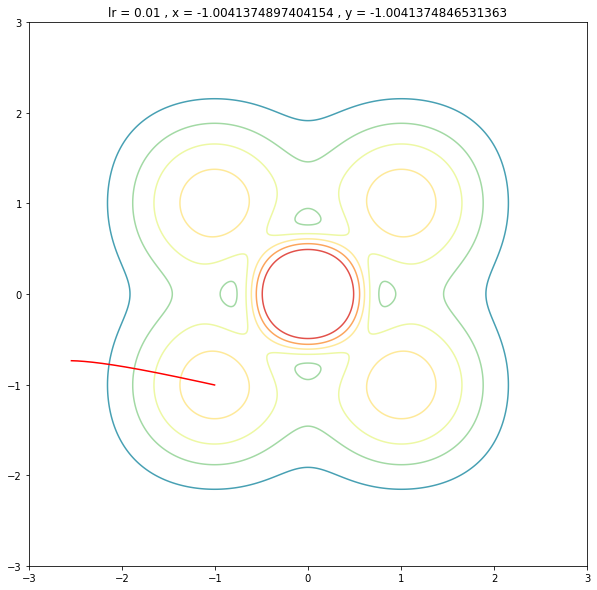

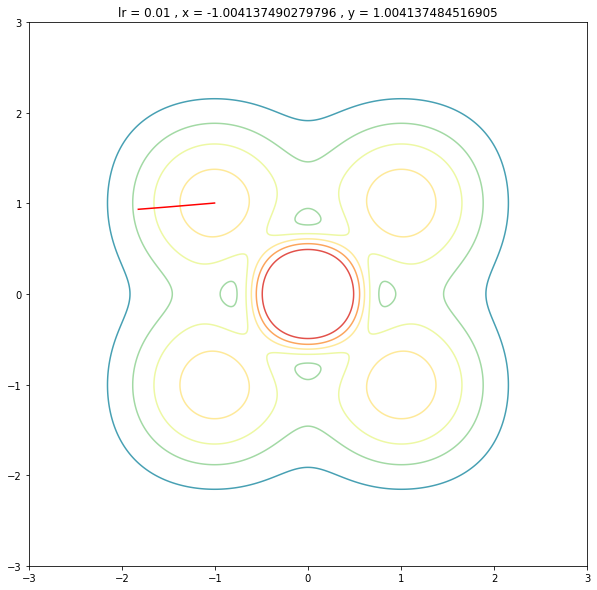

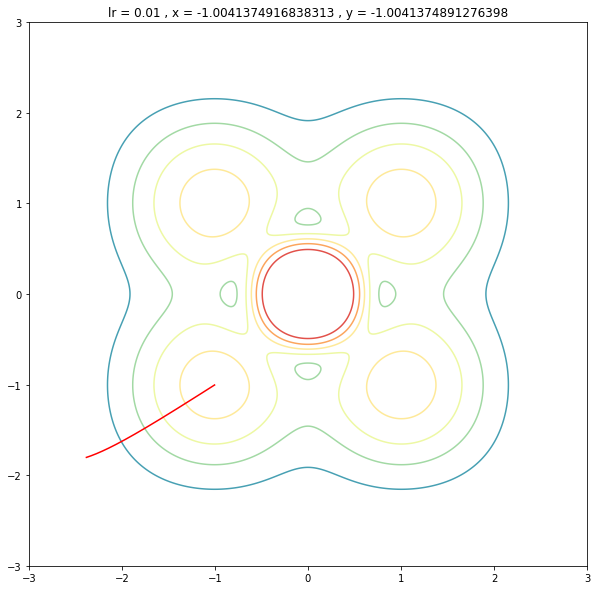

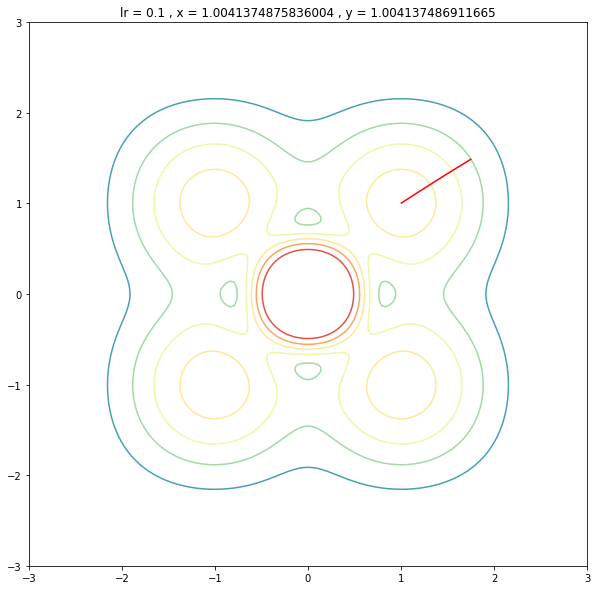

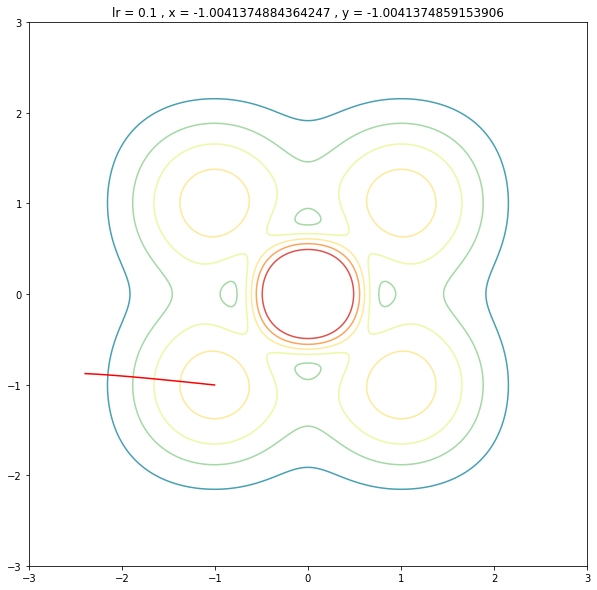

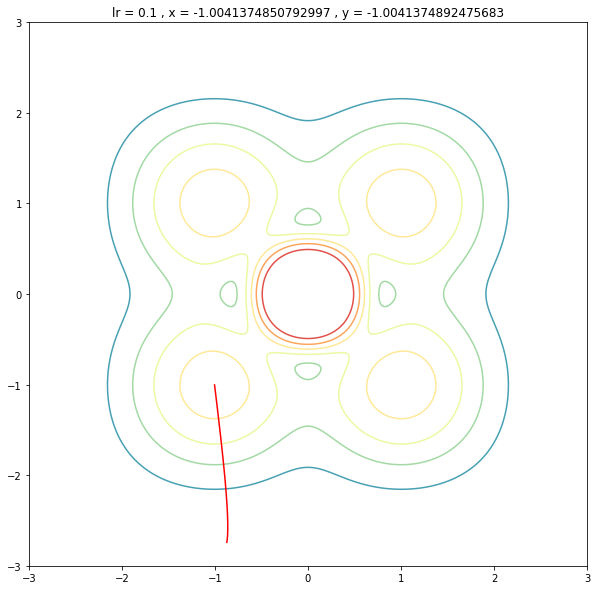

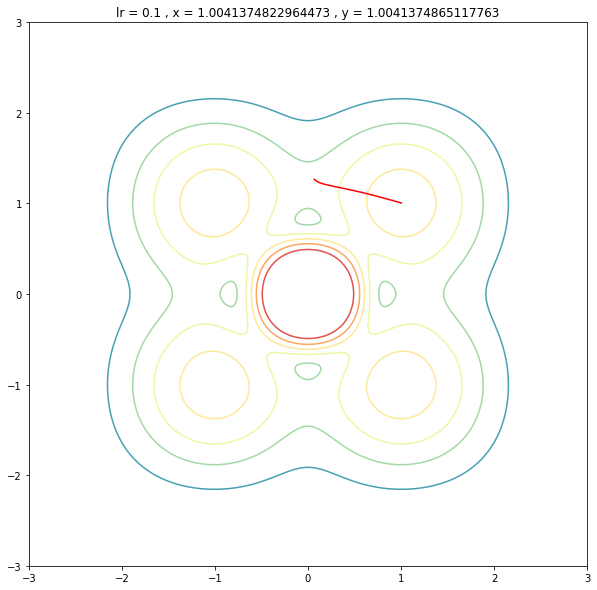

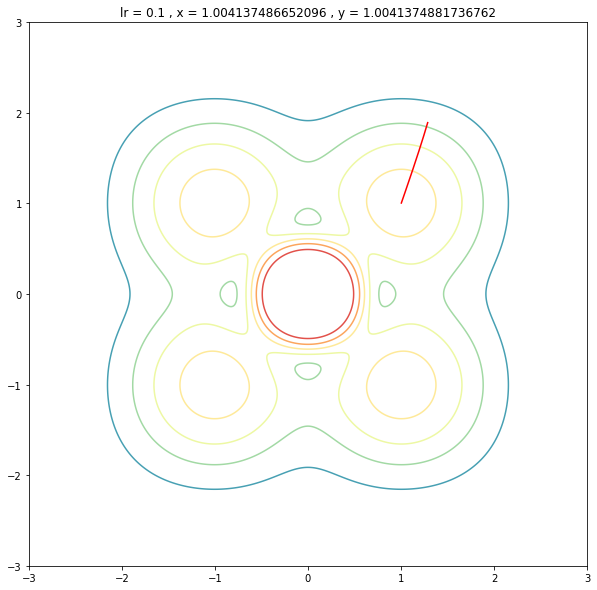

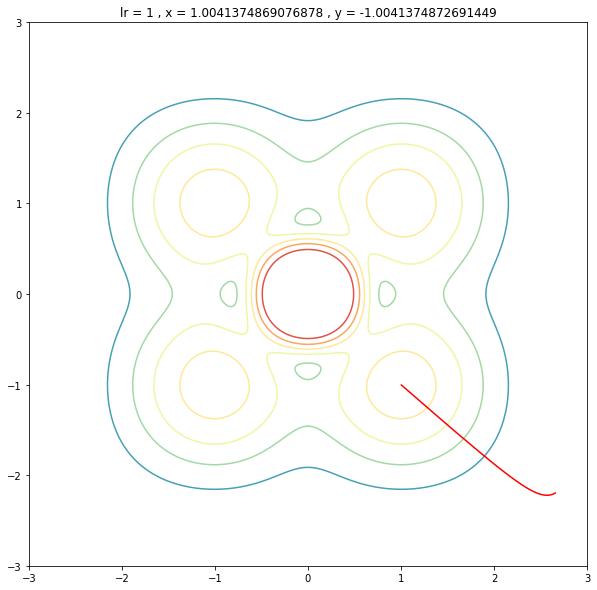

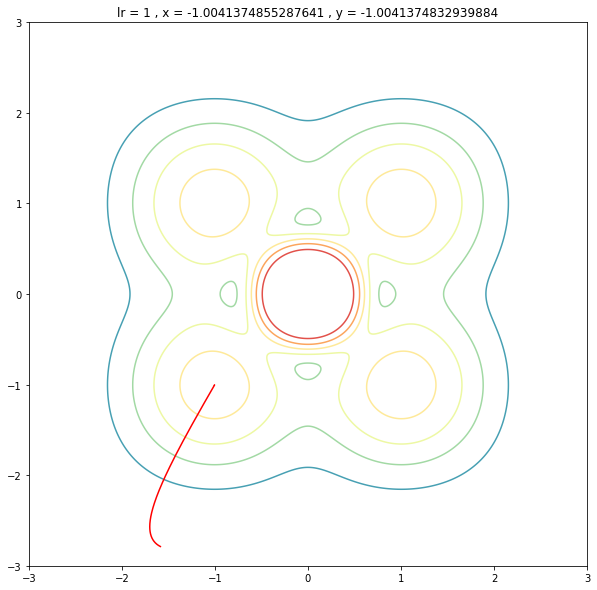

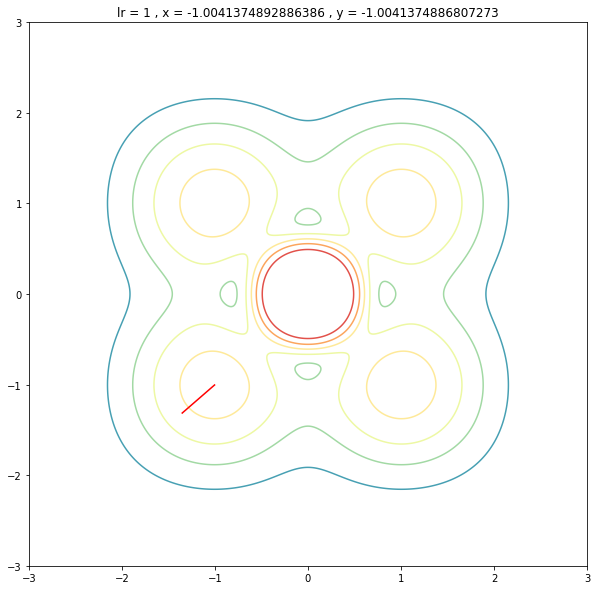

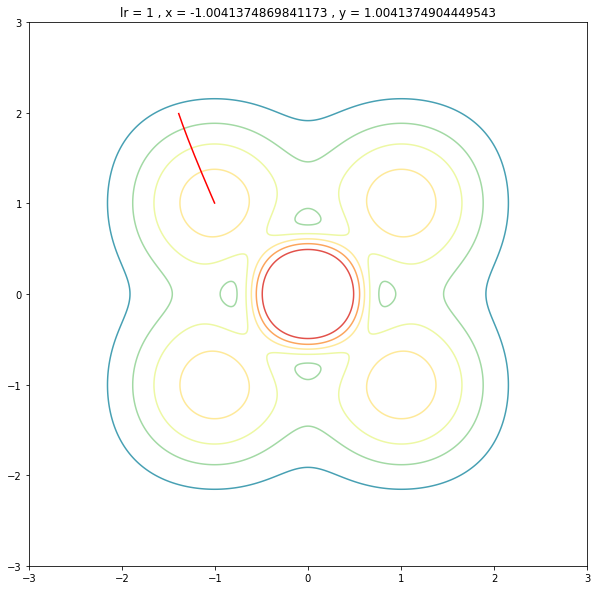

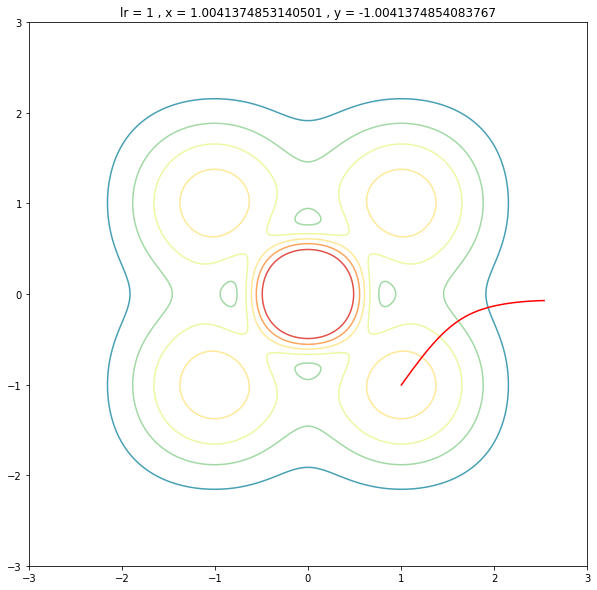

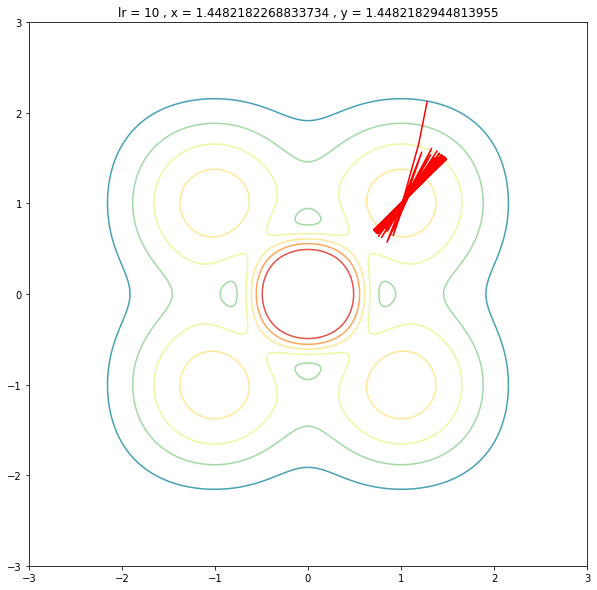

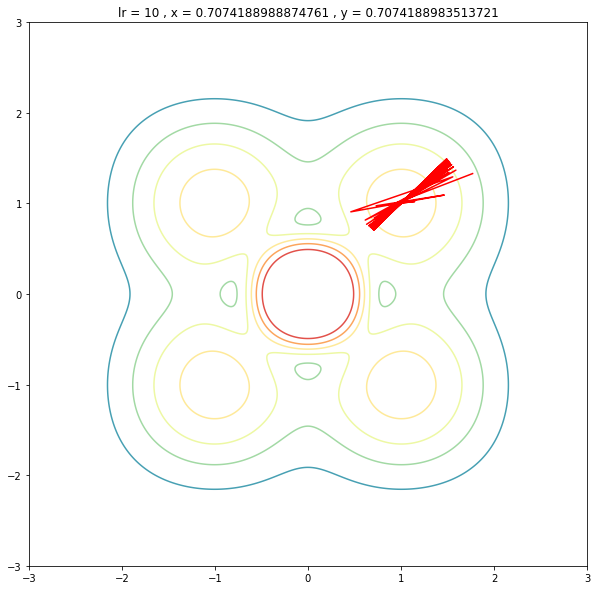

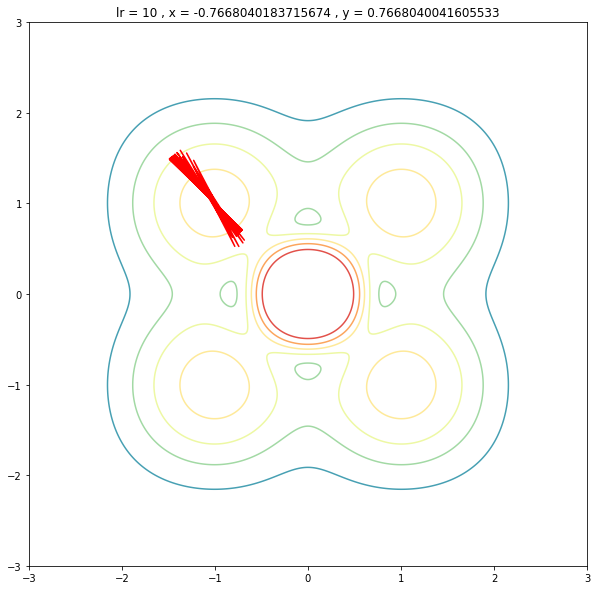

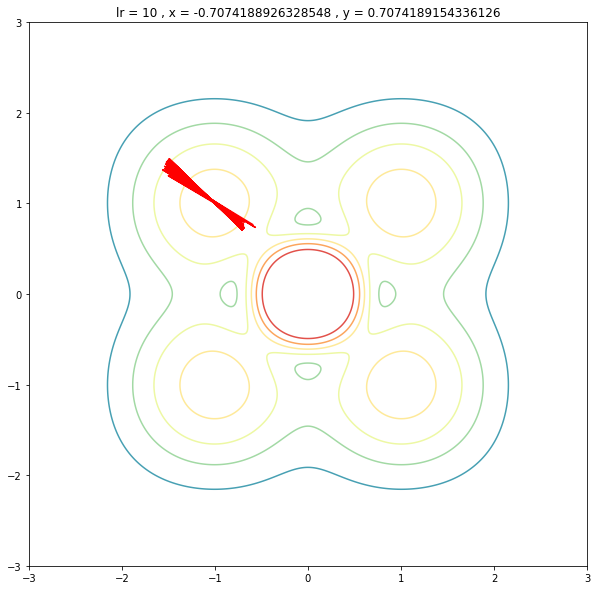

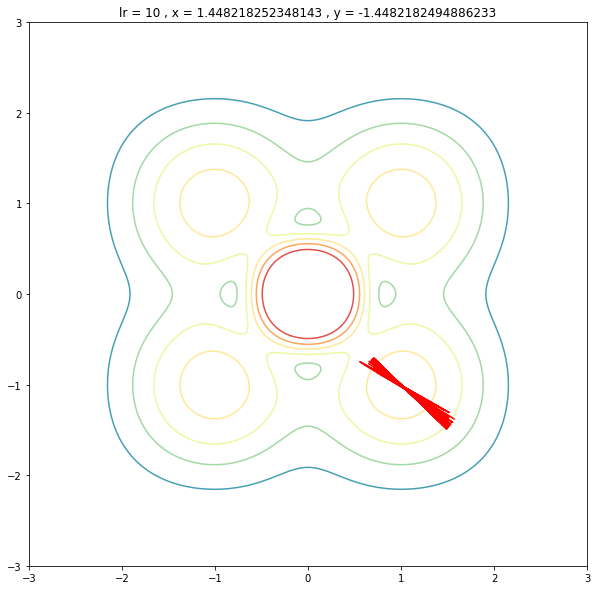

In [26]:
def GD(func, init_x, init_y, lr, max_iter):
    path = []
    # Perform gradient descent update iterations
    for i in range(max_iter):
        x_grad, y_grad = grad(func, init_x, init_y)
        init_x -= lr * x_grad
        init_y -= lr * y_grad
        path.append([init_x, init_y])
    return init_x, init_y , path

def minimize(func, lr, max_iter=10000):
    # minimize the given function and visaulize the results
    random_points = np.random.uniform(-2.8 , 2.8 , size=(5,2))
    for i, point in enumerate(random_points):
        x, y, path = GD(func, point[0], point[1], lr, max_iter)
        path_visualize(path)
        plt.title(i)
        plt.title(f"lr = {lr} , x = {x} , y = {y}")
        plt.show()
    return x, y

lrs = [0.001, 0.01, 0.1, 1, 10]
for lr in lrs:
    minimize(f, lr)


### LR decay GD

<font size=3>
   Now we want to better GD's performance by augmenting the learning rate (lr) and adding a decay effect through iterations.  
 <br>  <br> 
You need to implement a mechanism similar to Simulated Anealing (SA) to modify learning rate (lr) during runtime. The initial value for lr can be 0.5 and how you change it should be according to the SA lecture. Again, random initial points, analysis and visualization are required.
    <br><br>
</font>

# LR decay Analysis
<font face="Times New Roman" size=4><div dir=ltr>

with this technique we can start of with a big learning rate like 1 and head toward minima faster and as we get closer we will use the smaller learning rate  generated by decay fucntion so that

we converge and doesnt move up and forth (zig zag) near the local minima.
the effect of exponential decay is seen in the 5 examples 


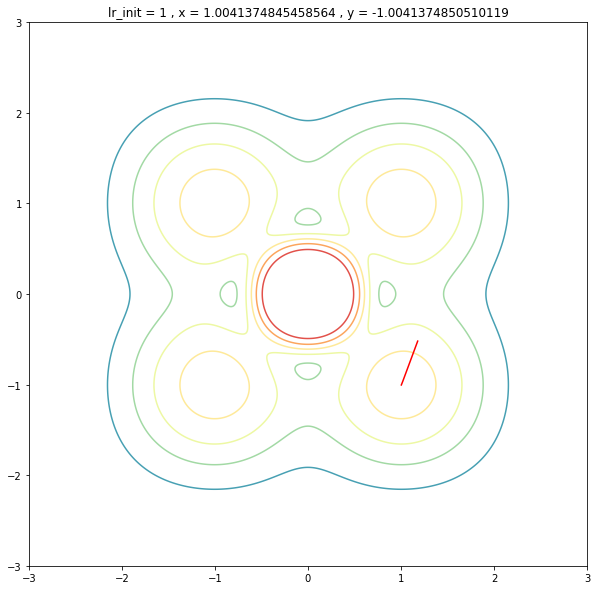

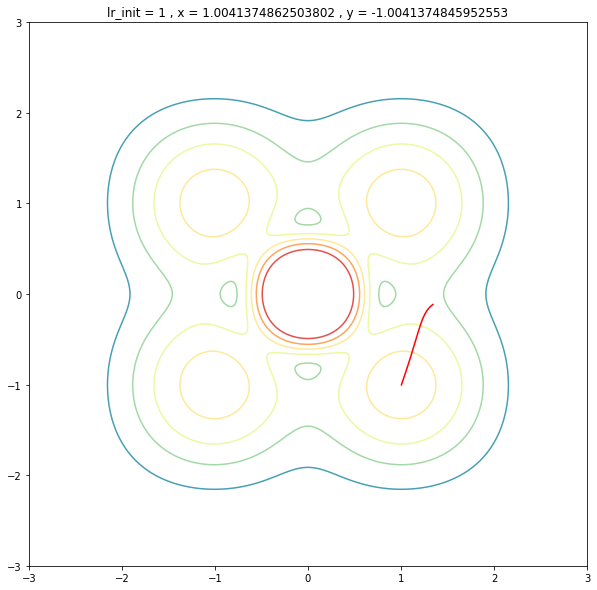

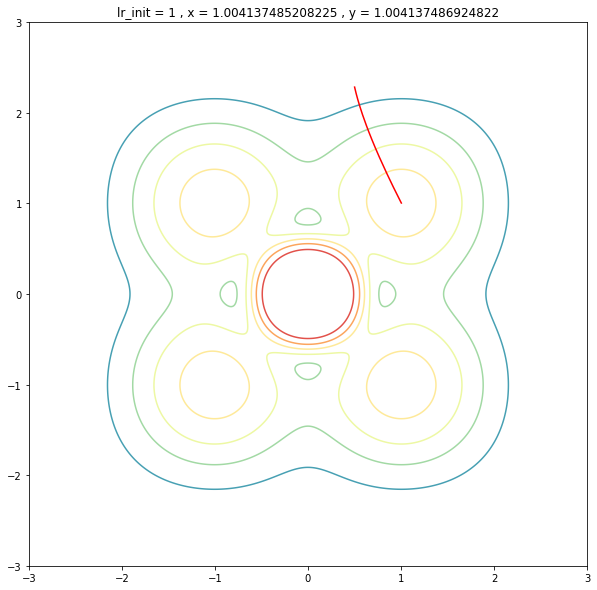

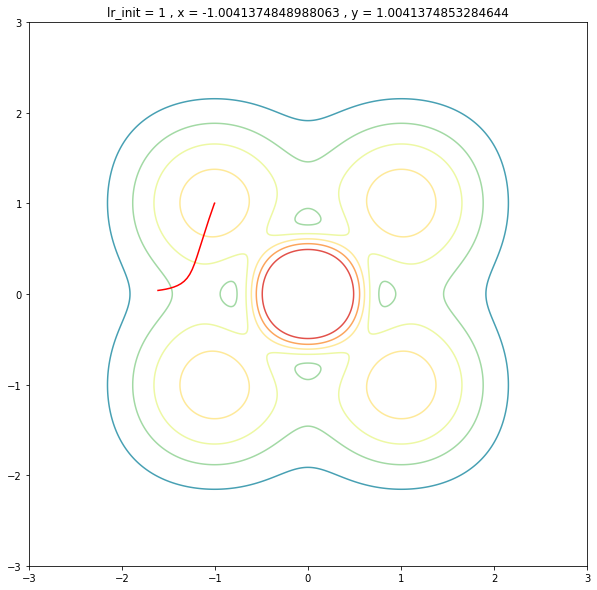

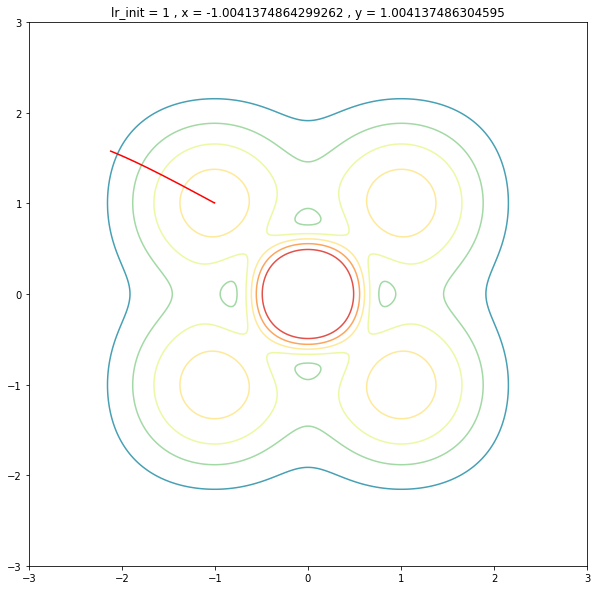

(-1.0041374864299262, 1.004137486304595)

In [31]:
def GD_variable_lr(func, init_x, init_y, lr_init, max_iter):
    # perform GD with learning rate varying by temprature
    lr = lr_init
    path = []
    lrs = []
    for i in range(max_iter):
        lrs.append(lr)
        x_grad, y_grad = grad(func, init_x, init_y)
        init_x -= lr * x_grad
        init_y -= lr * y_grad
        path.append([init_x, init_y])
        lr -= lr_init / max_iter
    return init_x, init_y , path, lrs

def minimze_variable_lr(func, lr_init, max_iter=10000):
    # minimze the given function and visaulize the results
    random_points = np.random.uniform(-2.5 , 2.5 , size=(5,2))
    for i, point in enumerate(random_points):
        x, y, path, lrs = GD_variable_lr(func, point[0], point[1], lr_init, max_iter)
        path_visualize(path)
        plt.title(i)
        plt.title(f"lr_init = {lr_init} , x = {x} , y = {y}")
        plt.show()
        #plt.plot(lrs)
        #plt.show()
    return x, y


minimze_variable_lr(f, 1)

### GD with momentum

<font size=3>
    Momentum is a mechanism which accelerates gradient vectors in the right direction and helps with faster convergence when it comes to the stochastic GD. Briefly saying a simple change in GD update equation will do the work. What happens is that we store the previous state of our updating parameter(s) and use it to simulate a momentum for updating path. The detailed explanation can be find <a href='https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d'>here</a>. 
   This technique is widely used for Stochastic GD. Here, we want to examine it on a double parameter scenario. The update equation is here:
    <br><br>
</font>
<font size=4>
     $$ X_t = X_t - \gamma(\beta X_{t-1} + (1-\beta)\nabla_Xf(X))$$
    </font>
    <br>
<font size=3>
   After performing the experiments, provide your analysis and visualization (path_visualize). 
    <br><br>
</font>

$$ X_t = X_t - \gamma(\beta X_{t-1} + (1-\beta)\nabla_Xf(X))$$

# LR Momentum Analysis
<font face="Times New Roman" size=4><div dir=ltr>

this technique converges much faster. the reason is using momentum our final direction is the sum of our previous action + the new gradient which is kinda the best of both worlds
because we are updating our steps + moving in a good direction which we have been moving along (it will cause less zig zag and up and forth moves) in countours which cause constant change in direction which leads to not converging or moving up and forth constantly in one axis. this techinque fix that in this kinda situations and **smooth** the gradient decsent by removing oscilations and we need much straight forward path in its path.

It can help us escape small local minimas as it will have a term which is the last gradient (we can see from the countous that it is trying to escape the local minimas)

(-1.0041374858218326, -1.0041374858954992)

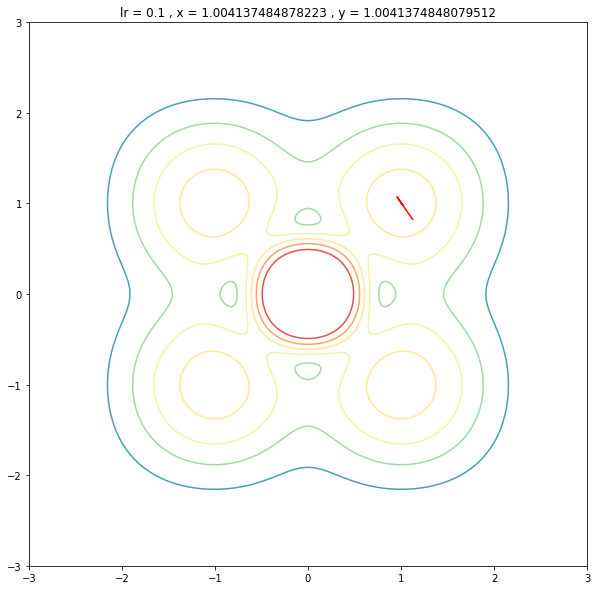

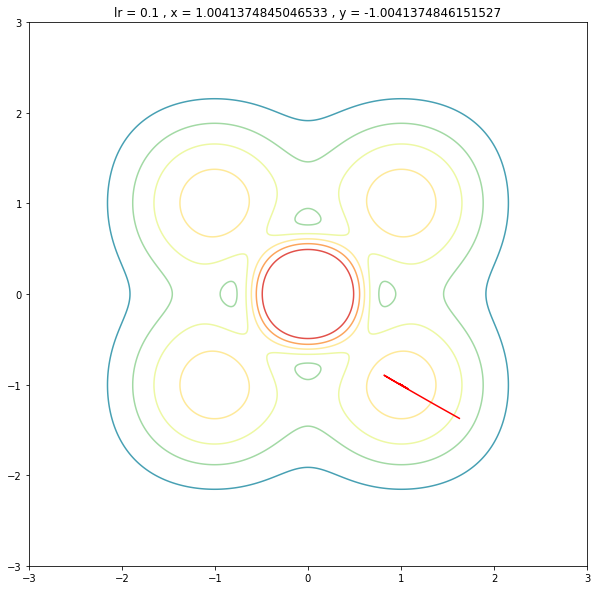

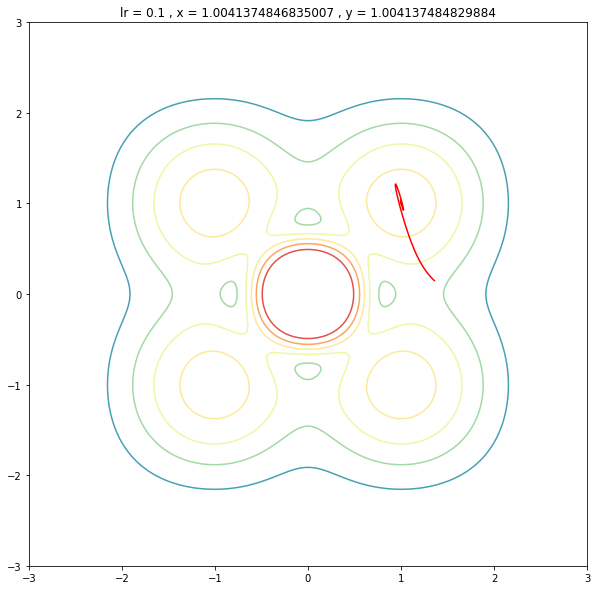

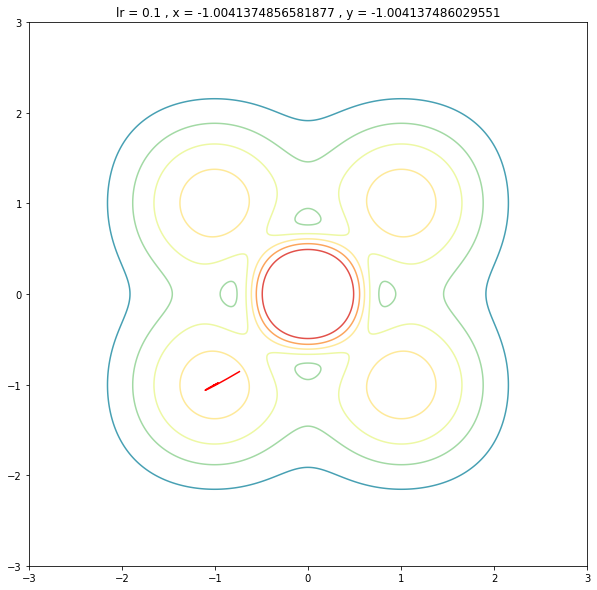

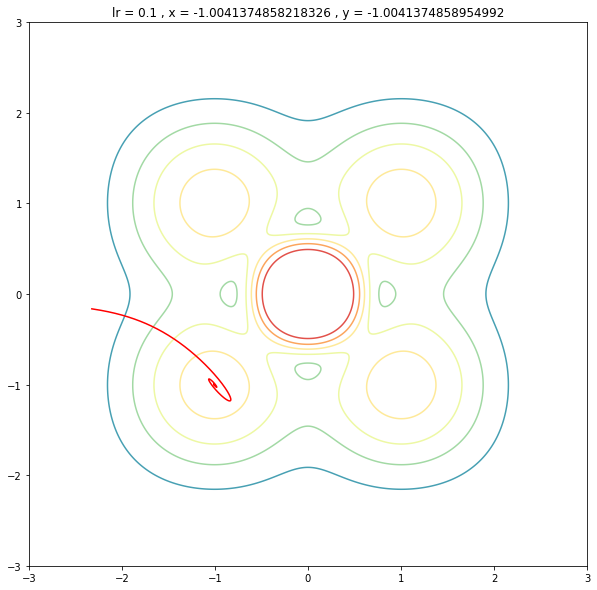

In [28]:
def GD_momentum(func, init_x, init_y, lr, max_iter):
    #generate gradient decsent with momentum update
    #I am using a exponential decay for the learning rate
    path = []
    beta = 0.99
    V = 0
    last_x = 0
    last_y = 0
    for i in range(max_iter):
        V = beta * V + (1 - beta) * np.array(grad(func, init_x, init_y))  #if using the source givven in the question, use this line
        #V = beta * np.array([last_x, last_y])+ (1 - beta) * np.array(grad(func, init_x, init_y)) if using the given formula use this line
        last_x = init_x
        last_y = init_y
        init_x -= lr * V[0]
        init_y -= lr * V[1]
        path.append([init_x, init_y])
    return init_x, init_y , path       

def minimze_momentum(func, lr, max_iter=10000):
    random_points = np.random.uniform(-2.5 , 2.5 , size=(5,2))
    for i, point in enumerate(random_points):
        x, y ,path = GD_momentum(func, point[0], point[1], lr, max_iter)
        path_visualize(path)
        plt.title(i)
        plt.title(f"lr = {lr} , x = {x} , y = {y}")
    return x, y

minimze_momentum(f, 0.1)